梯度提升树模型
弱分类器个数180
学习率0.1

In [52]:
import seaborn as sns


def print_k_fold(cv_estimator, key):
    """
    打印估算器中的每个参数的值
    :param cv_estimator:
    :return:
    """
    result = grid_search.cv_results_
    sns.lineplot(x=[i[key] for i in result['params']],
                 y=result['mean_train_score'], label='train')
    sns.lineplot(x=[i[key] for i in result['params']],
                 y=result['mean_test_score'], label='test')

In [4]:

import numpy as np
import pandas as pd
from sklearn.metrics import make_scorer, mean_squared_log_error, mean_absolute_percentage_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
# from ..util import print_k_fold
import torch

np.random.seed(42)
X, y = torch.load('data/house_price.pkl')
X_train, X_test = X.iloc[:len(y)], X.iloc[len(y):]

model = GradientBoostingRegressor()
score = cross_val_score(model, X_train, y,
                        scoring=make_scorer(mean_absolute_percentage_error, greater_is_better=False),
                        verbose=2,
                        n_jobs=-1)
print(score.mean())



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


-0.09200406774764407


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished


In [50]:
# 调整学习器个数
grid_search = GridSearchCV(GradientBoostingRegressor(n_estimators=180),
                           param_grid={'n_estimators': [100, 200, 300]},
                           scoring=make_scorer(mean_squared_log_error, greater_is_better=False), verbose=2, n_jobs=-1,
                           return_train_score=True, cv=10)
grid_search.fit(X, y)



Fitting 10 folds for each of 7 candidates, totalling 70 fits


d:\project\python\.venv\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [-0.13256721 -0.03904391 -0.01573562 -0.01800439 -0.02105949 -0.03012872
         nan]
  warnings.warn(


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(n_estimators=180),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7,
                                           0.9]},
             return_train_score=True,
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False),
             verbose=2)

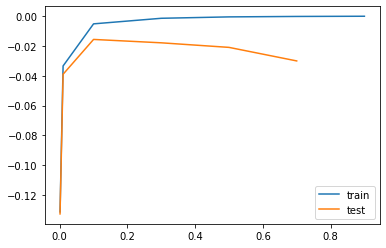

In [53]:
print_k_fold(grid_search, 'learning_rate')

In [54]:
grid_search.best_params_

{'learning_rate': 0.1}